In [36]:
# gmm 参考链接 https://blog.csdn.net/weixin_42555080/article/details/92222665

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, mixture, metrics
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.core.interactiveshell import InteractiveShell


In [35]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [34]:
%config IPCompleter.greedy=True


In [12]:
def generate_data():
    np.random.seed(0)
    # 设置或者提取对角线元素
    cov1 = np.diag((1, 2))
    N1 = 500
    N2 = 300
    x1 = np.random.multivariate_normal(mean=(1, 2), cov=cov1, size=N1)
    m = np.array(((1, 1), (1, 3)))
    x1 = x1.dot(m)
    
    x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
    x = np.vstack((x1, x2))
    y = np.array([0] * N1 + [1] * N2)
    return x, y

In [15]:
x, y = generate_data()

In [16]:
def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a-d, b+d


def accuracy_rate(y1, y2):
    acc = np.mean(y1 == y2)
    return acc if acc > 0.5 else 1-acc

In [20]:
types = ('spherical', 'diag', 'tied', 'full')
err = np.empty(len(types))
bic = np.empty(len(types))
for i, cov_type in enumerate(types):
    gmm = mixture.GaussianMixture(n_components=2, 
                                  covariance_type=cov_type,
                                  random_state=66
                                 )
    gmm.fit(x)
    err[i] = 1 - accuracy_rate(gmm.predict(x), y)
    bic[i] = gmm.bic(x)
err
bic

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=66, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=66, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=66, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=66, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

array([0.385  , 0.315  , 0.3025 , 0.00125])

array([7990.62231203, 7855.52494849, 8006.55607049, 6845.79436384])

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

(6787.756278509815, 8064.5941558256245)

([<matplotlib.axis.XTick at 0x10535da90>,
 <a list of 4 Text xticklabel objects>)

Text(0.5, 1.0, '不同方差类型的误差率和BIC')

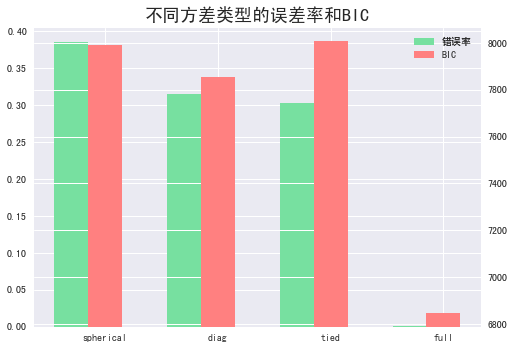

In [27]:
ax = plt.axes()
x_lim = np.arange(4)
ax.bar(x_lim - 0.3, err, width=0.3, color='#77E0A0', label='错误率')
ax.twinx().bar(x_lim, bic, width=0.3, color='#FF8080', label='BIC')
ax.legend()
bic_min, bic_max = expand(bic.min(), bic.max())
plt.ylim((bic_min, bic_max))
plt.xticks(xpos, types)
plt.legend([b1[0], b2[0]], (u'错误率', u'BIC'))
plt.title(u'不同方差类型的误差率和BIC', fontsize=18)
plt.show()

In [28]:
expand(bic.min(), bic.max())

(6787.756278509815, 8064.5941558256245)

In [30]:
bic.min(), bic.max()

(6845.794363842352, 8006.556070493088)

In [33]:
6845.794363842352 - (bic.max() - bic.min()) * 0.05, 8006.556070493088 + (bic.max() - bic.min()) * 0.05

(6787.756278509815, 8064.5941558256245)